In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Consider only the below columns and prepare a prediction model for predicting Price.
## Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


# Dataset Description
- Model -- model of the car
- Price  -- Offer Price in EUROs	
- Age_08_04 -- Age in months as in August 2004	
- Mfg_Month -- Manufacturing month (1-12)	
- Mfg_Year	-- Manufacturing Year
- KM -- Accumulated Kilometers on odometer
- Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
- HP -- Horse Power
- Met_Color	 -- Metallic Color?  (Yes=1, No=0)
- Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
- Automatic	-- Automatic ( (Yes=1, No=0)
- cc -- Cylinder Volume in cubic centimeters
- Doors -- Number of doors
- Cylinders	-- Number of cylinders
- Gears -- Number of gear positions
- Quarterly_Tax -- Quarterly road tax in EUROs
- Weight -- Weight in Kilograms
- Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
- BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
- Guarantee_Period -- 	Guarantee period in months
- ABS -- Anti-Lock Brake System (Yes=1, No=0)
- Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
- Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
- Airco -- Airconditioning  (Yes=1, No=0)
- Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
- Boardcomputer -- Boardcomputer  (Yes=1, No=0)
- CD_Player -- CD Player  (Yes=1, No=0)
- Central_Lock -- Central Lock  (Yes=1, No=0)
- Powered_Windows -- Powered Windows  (Yes=1, No=0)
- Power_Steering -- Power Steering  (Yes=1, No=0)
- Radio -- Radio  (Yes=1, No=0)
- Mistlamps	-- Mistlamps  (Yes=1, No=0)
- Sport_Model -- Sport Model  (Yes=1, No=0)
- Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
- Metallic_Rim --Metallic Rim  (Yes=1, No=0)
- Radio_cassette -- Radio Cassette  (Yes=1, No=0)
- Tow_Bar -- Tow Bar  (Yes=1, No=0)


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
corolla_data = pd.read_csv("ToyotaCorolla.csv")

In [5]:
corolla_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
corolla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [7]:
# Considering only required variables for prediction model
corolla_data1=corolla_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
corolla_data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
corolla_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
corolla_data1.rename({"Age_08_04":"Age","cc":"CC"},axis=1,inplace=True)
corolla_data1.head()


,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [10]:
# Find Duplicates and remove them
corolla_data1[corolla_data1.duplicated(keep='last')]

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
112,24950,8,13253,116,2000,5,5,234,1320


In [11]:
corolla_data1.drop_duplicates(inplace=True,keep='last')
corolla_data1.reset_index(inplace=True,drop=True)
corolla_data1

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [12]:
corolla_data1[corolla_data1.duplicated(keep='last')] # No Duplicates

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight


In [13]:
corolla_data1.describe()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## Step 1 : Is there a connection between dependent and independent varaibles?

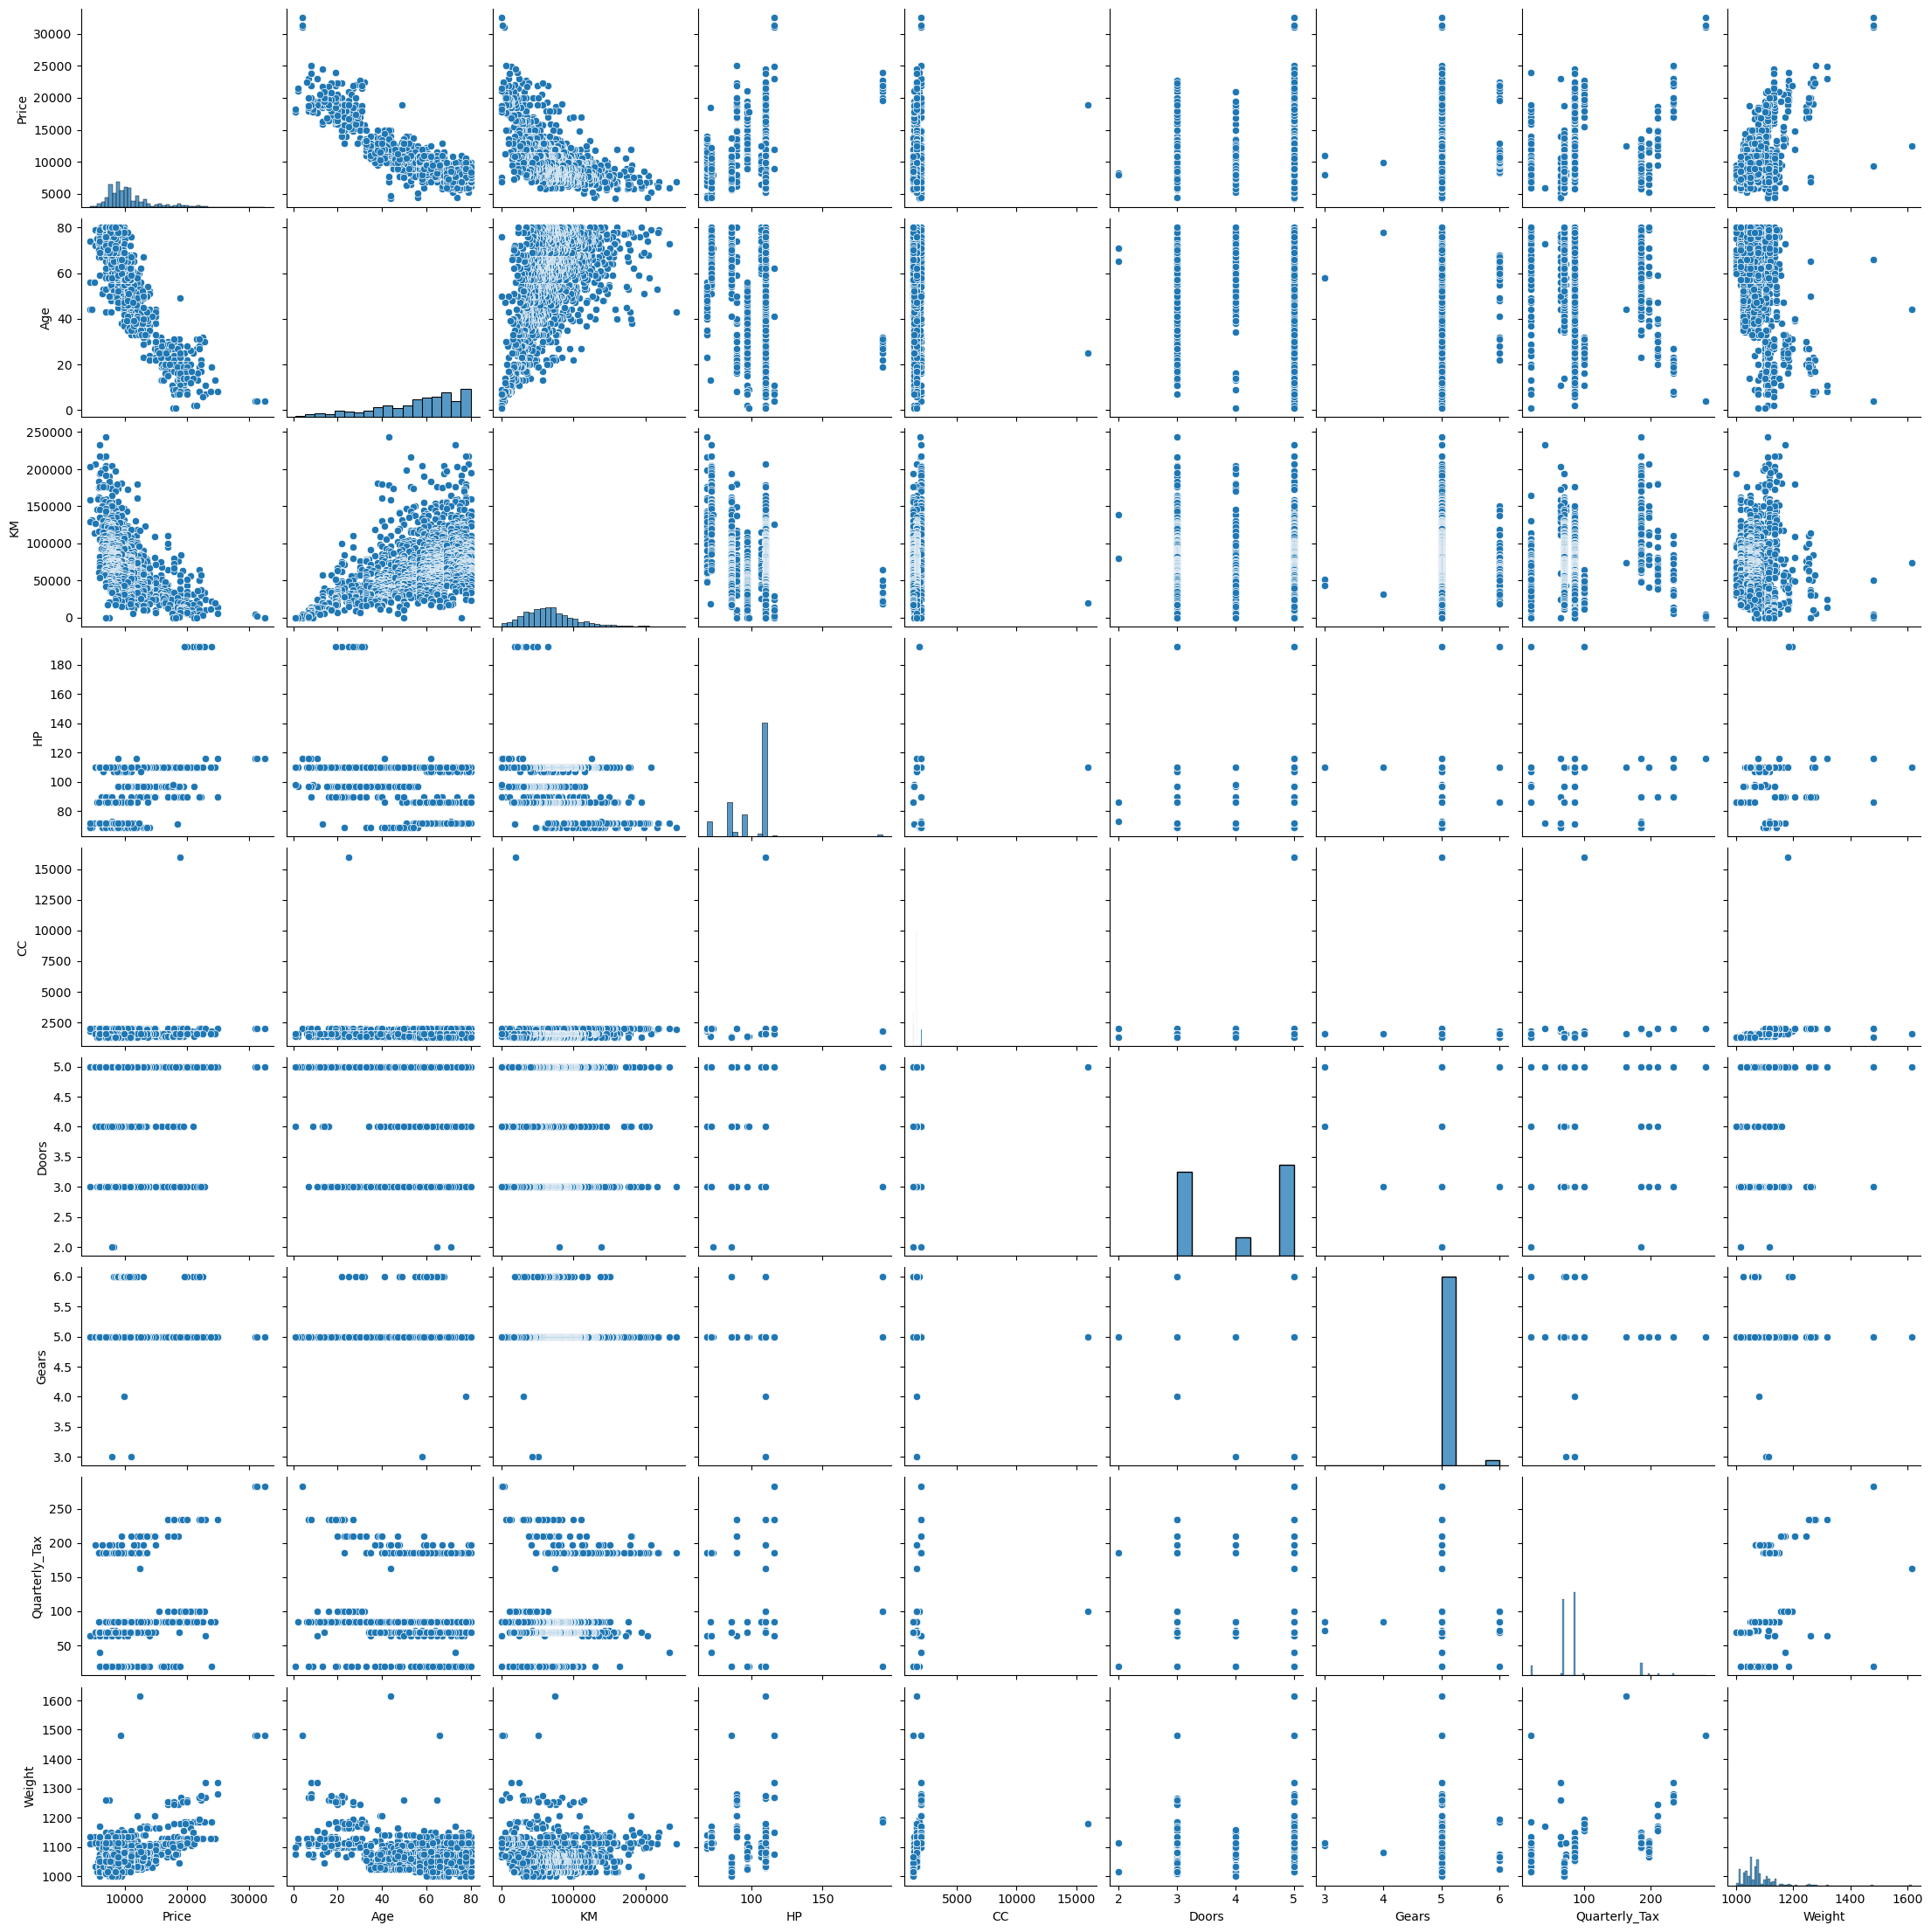

In [14]:
sb.pairplot(corolla_data1)
plt.show()

## Step 2 : is the relationship linear?

In [15]:
corolla_data1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


## Step 3 : Train the model

In [16]:
toyo=corolla_data1
model=ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=toyo).fit()
model.rsquared

0.8625200256947

In [17]:
# Model parameters
model.params

Intercept       -5472.540368
Age              -121.713891
KM                 -0.020737
HP                 31.584612
CC                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [18]:
# p-Values
np.round(model.pvalues,3)

Intercept        0.000
Age              0.000
KM               0.000
HP               0.000
CC               0.188
Doors            0.982
Gears            0.002
Quarterly_Tax    0.003
Weight           0.000
dtype: float64

In [19]:
# r_squared values
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

## the p-values are more than 0.05 for CC and Doors

In [20]:
# Finding Linear Regression models with the features
CC_model=ols('Price~CC',data=toyo).fit()

In [21]:
CC_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           2.29e-06
Time:                        14:05:55   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
CC             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
Doors_model=ols('Price~Doors',data=toyo).fit()

In [23]:
Doors_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           2.40e-12
Time:                        14:05:55   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
multi_model=ols('Price~CC+Doors',data=toyo).fit()

In [25]:
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           2.55e-15
Time:                        14:05:56   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
CC             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Finding VIF

In [26]:
x1_model=ols('Age~KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=toyo).fit()
x2_model=ols('KM~Age+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=toyo).fit()
x3_model=ols('HP~Age+KM+CC+Doors+Gears+Quarterly_Tax+Weight',data=toyo).fit()
x4_model=ols('CC~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyo).fit()
x5_model=ols('Doors~Age+KM+HP+CC+Gears+Quarterly_Tax+Weight',data=toyo).fit()
x6_model=ols('Gears~Age+KM+HP+CC+Doors+Quarterly_Tax+Weight',data=toyo).fit()
x7_model=ols('Quarterly_Tax~Age+KM+HP+CC+Doors+Gears+Weight',data=toyo).fit()
x8_model=ols('Weight~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax',data=toyo).fit()

In [27]:
x1_VIF=1/(1-x1_model.rsquared)
x2_VIF=1/(1-x2_model.rsquared)
x3_VIF=1/(1-x3_model.rsquared)
x4_VIF=1/(1-x4_model.rsquared)
x5_VIF=1/(1-x5_model.rsquared)
x6_VIF=1/(1-x6_model.rsquared)
x7_VIF=1/(1-x7_model.rsquared)
x8_VIF=1/(1-x8_model.rsquared)

In [28]:
pd.DataFrame({'X_value':['Age','KM','HP','CC','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[x1_VIF,x2_VIF,x3_VIF,x4_VIF,x5_VIF,x6_VIF,x7_VIF,x8_VIF]})

,X_value,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


## VIF is less than 5 , so there is no multi colinearity issue with the model hence we can consider all x-values for prediction

## Residual Analysis

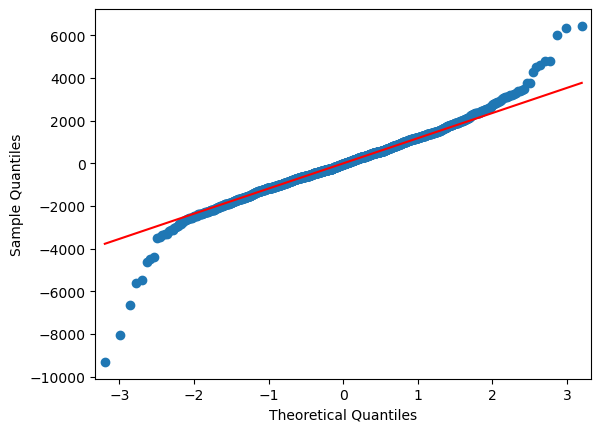

In [29]:
# Normality of Residuals - Verify if the residuals values is normally distributed or not
sm.qqplot(model.resid,line='q')
plt.show()

In [30]:
# Mean equal to zero
model.resid.mean()

-1.0358574238398116e-09

In [31]:
def standardize(x):
    return (x-x.mean())/x.std()

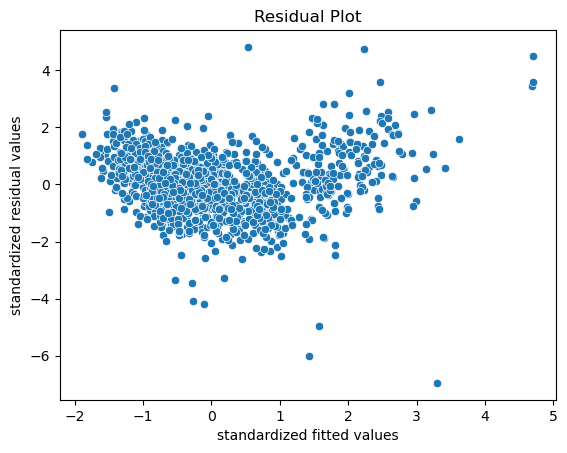

In [32]:
# Is the resid vs predicted values follow Homoscedasticity
sb.scatterplot(x=standardize(model.fittedvalues),y=standardize(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

eval_env: 1


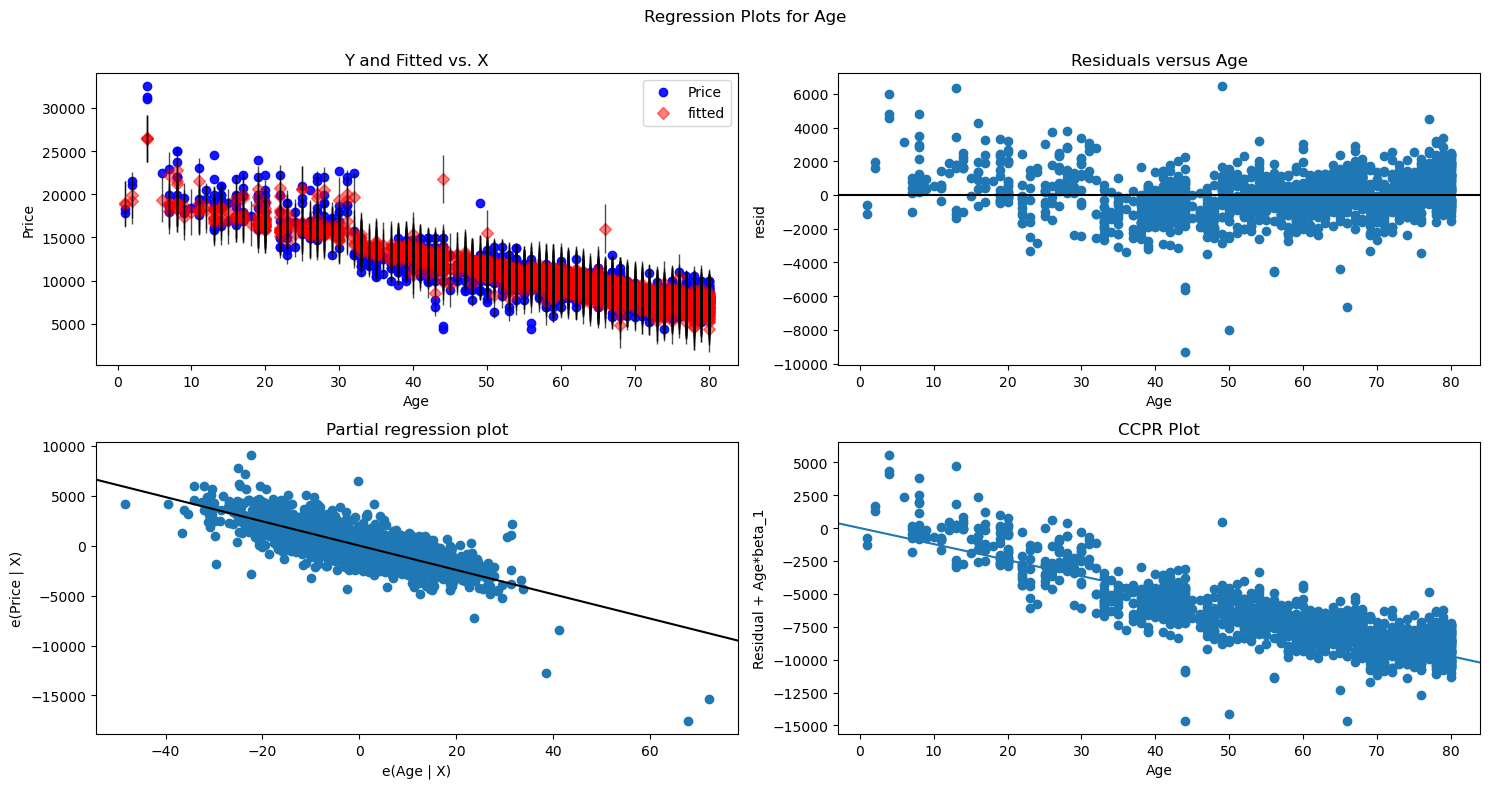

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

eval_env: 1


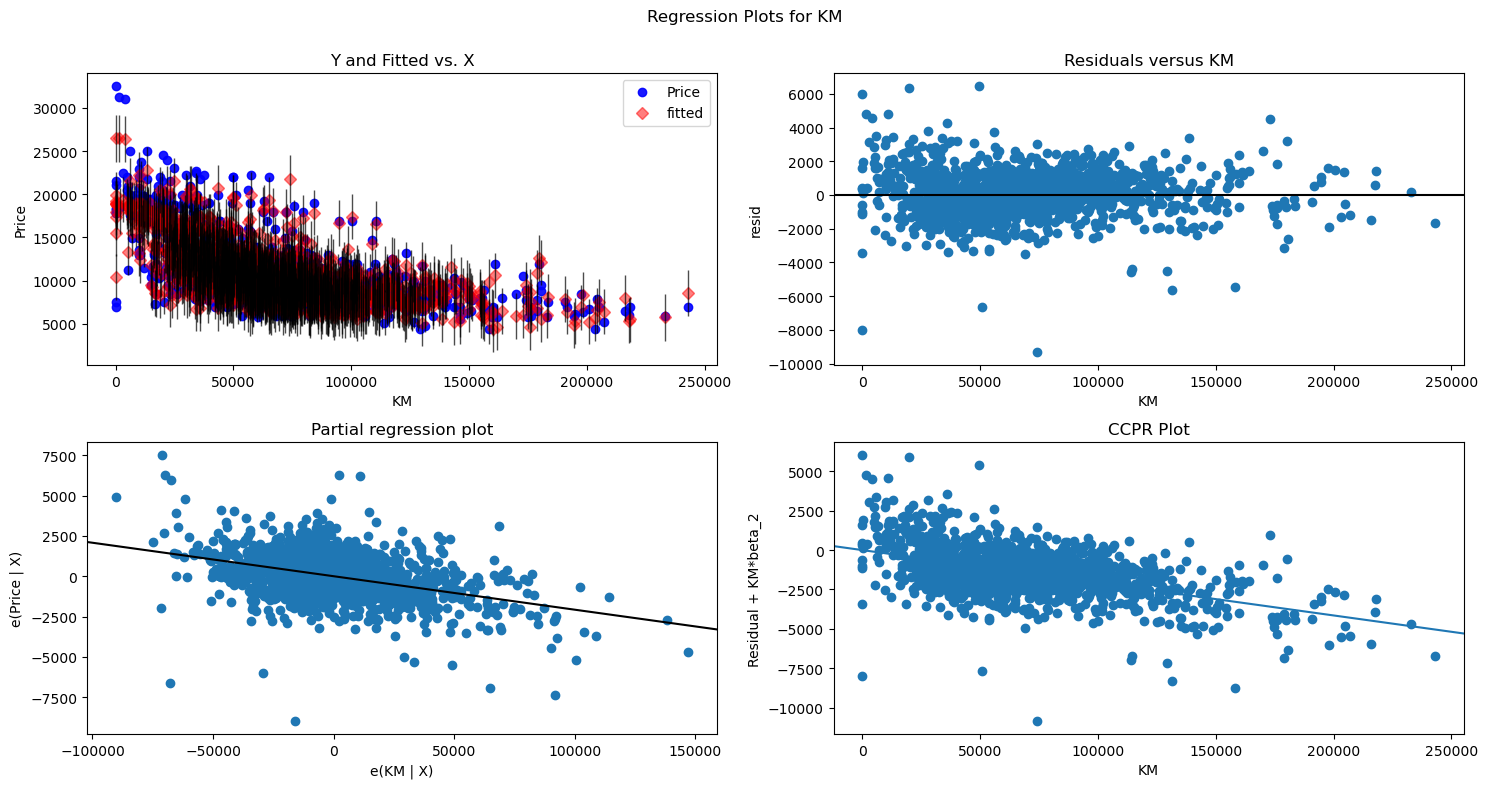

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


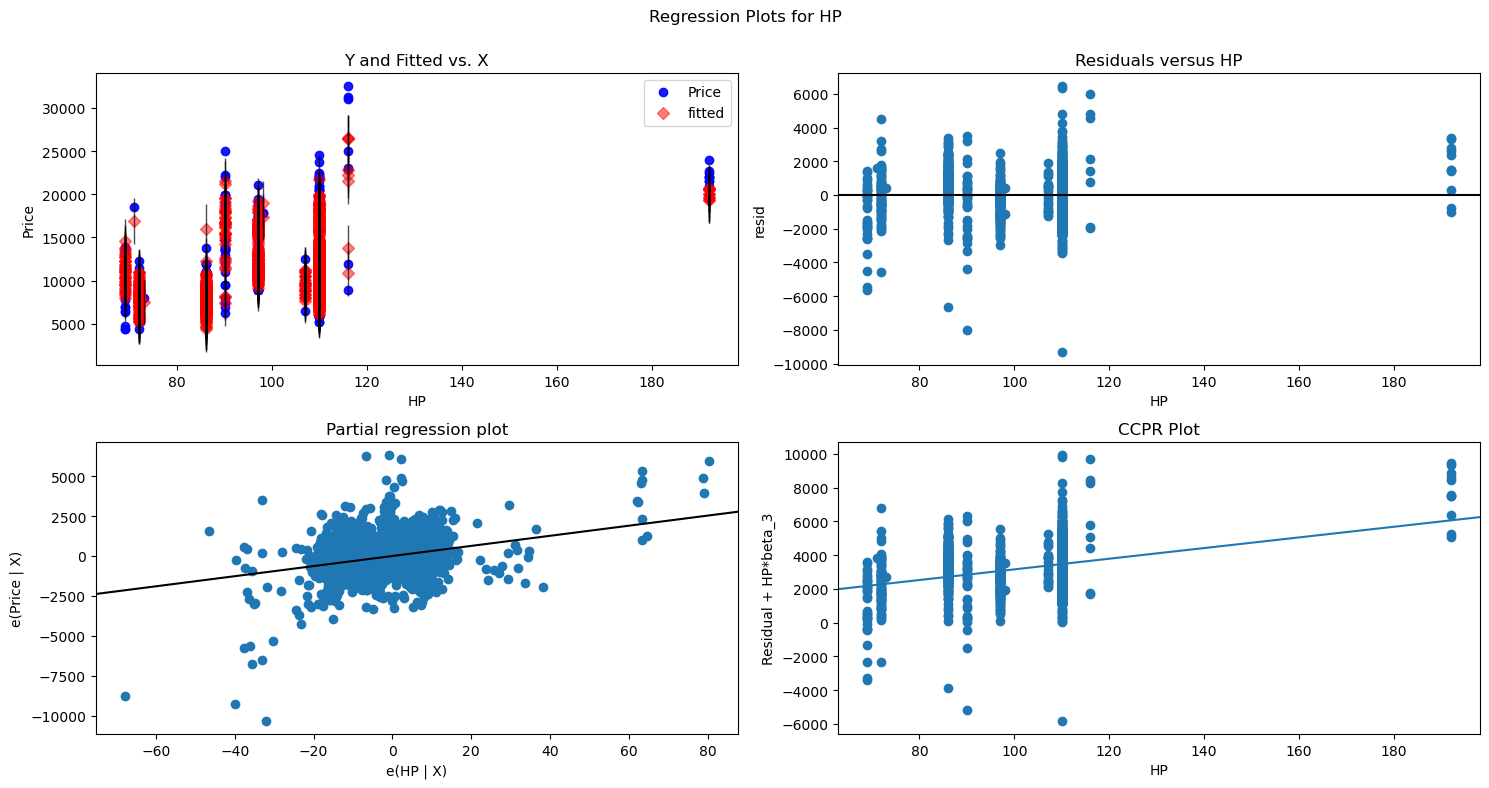

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


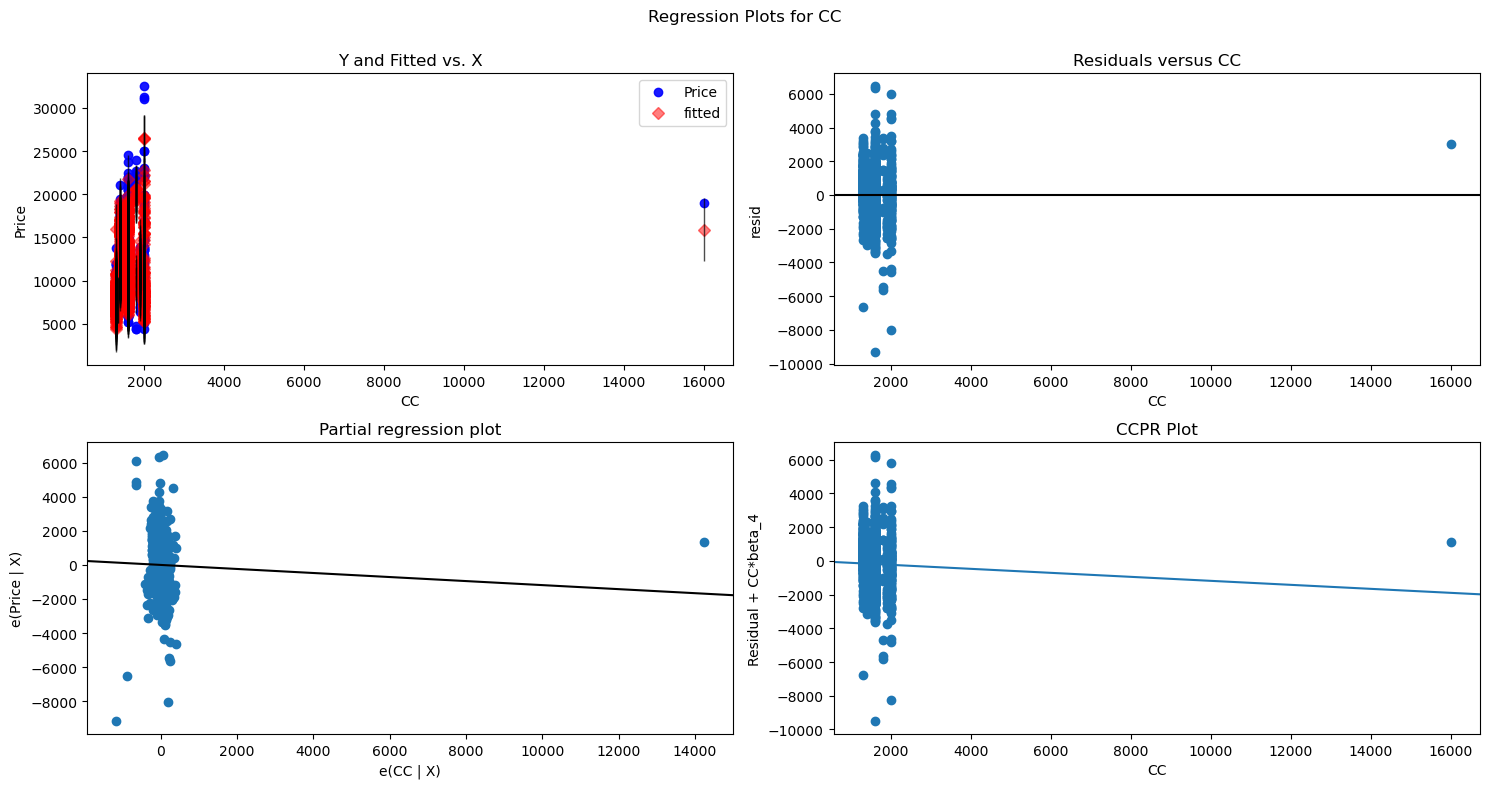

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "CC", fig=fig)
plt.show()

eval_env: 1


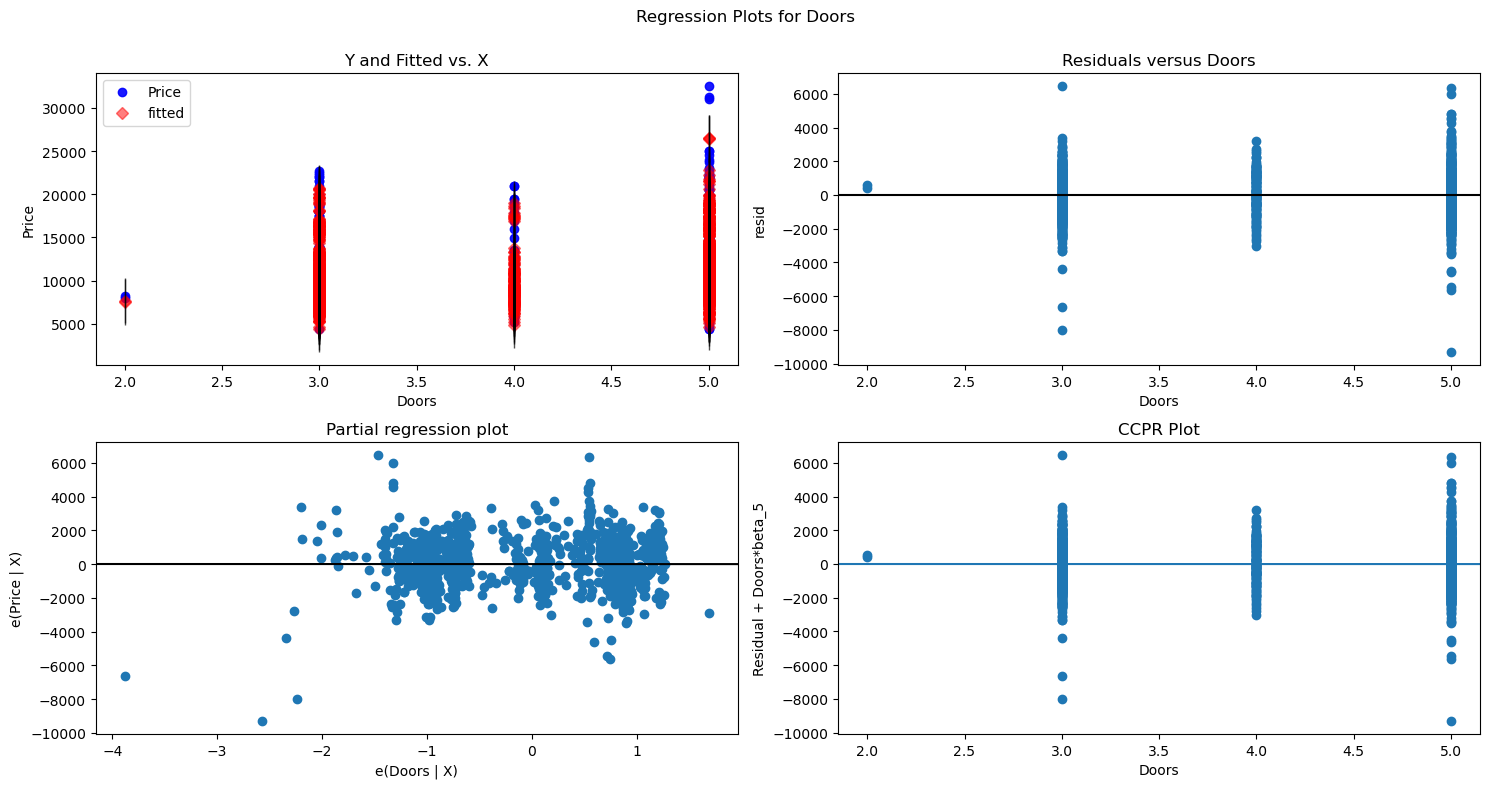

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


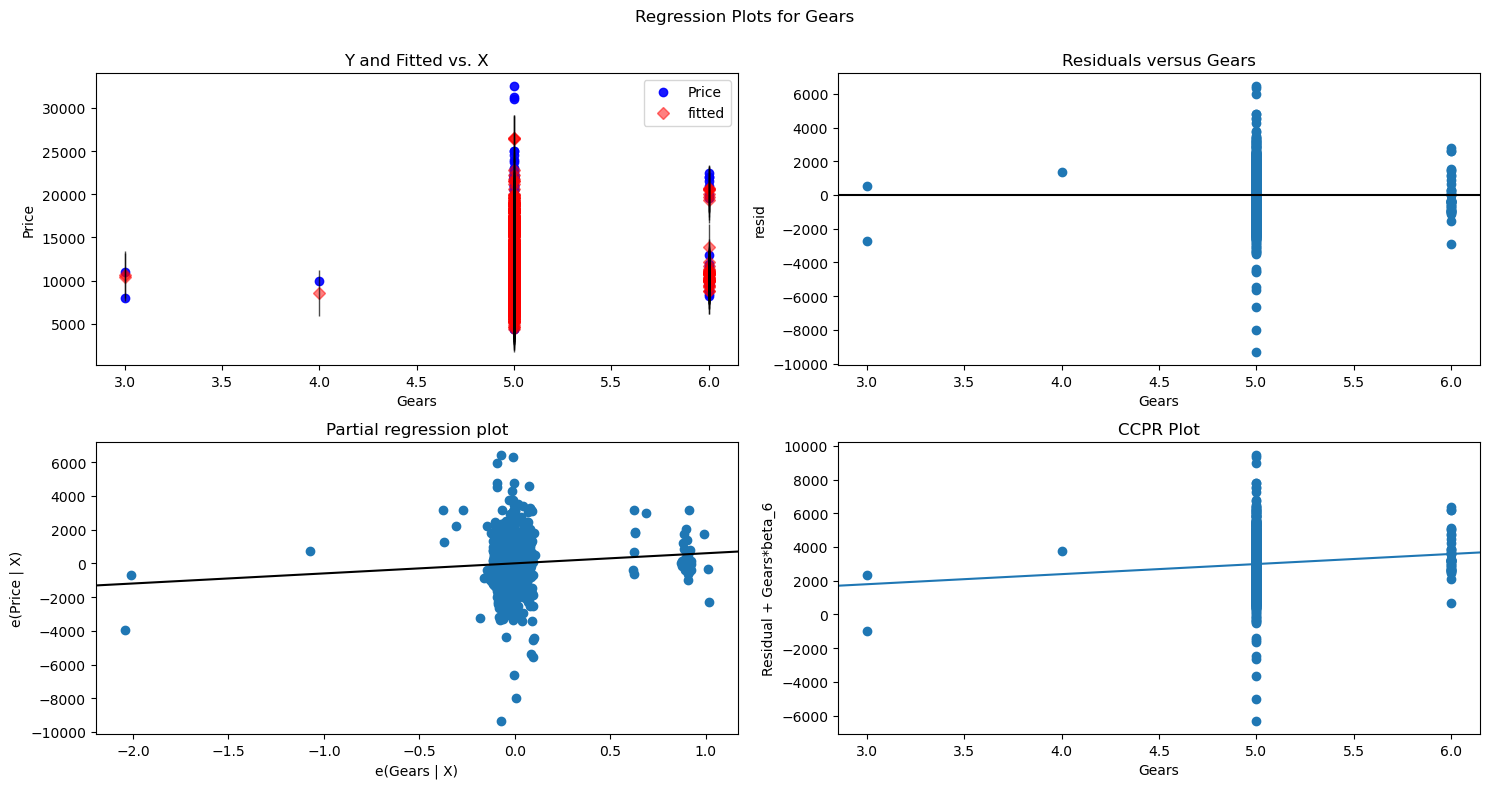

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


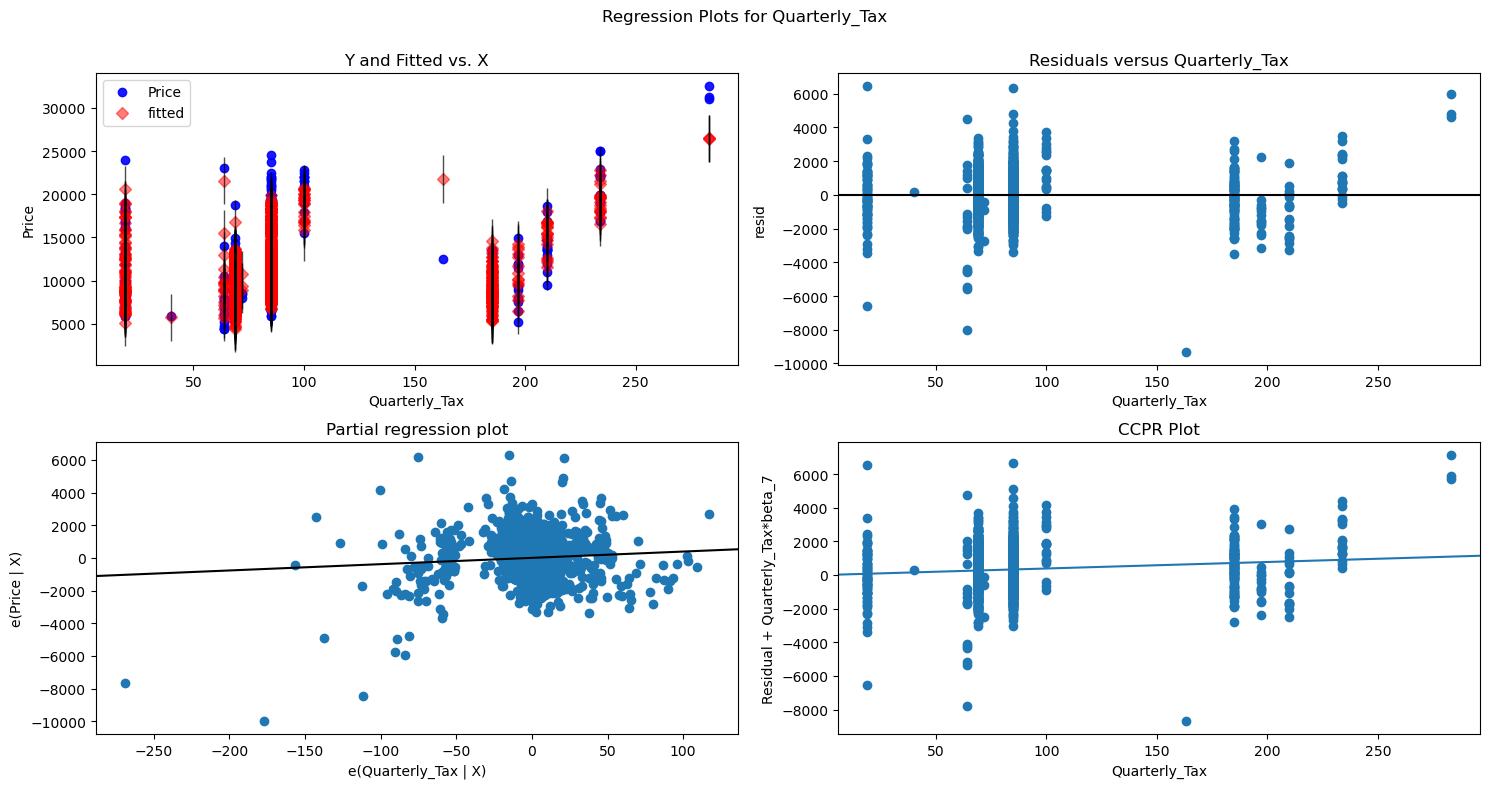

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


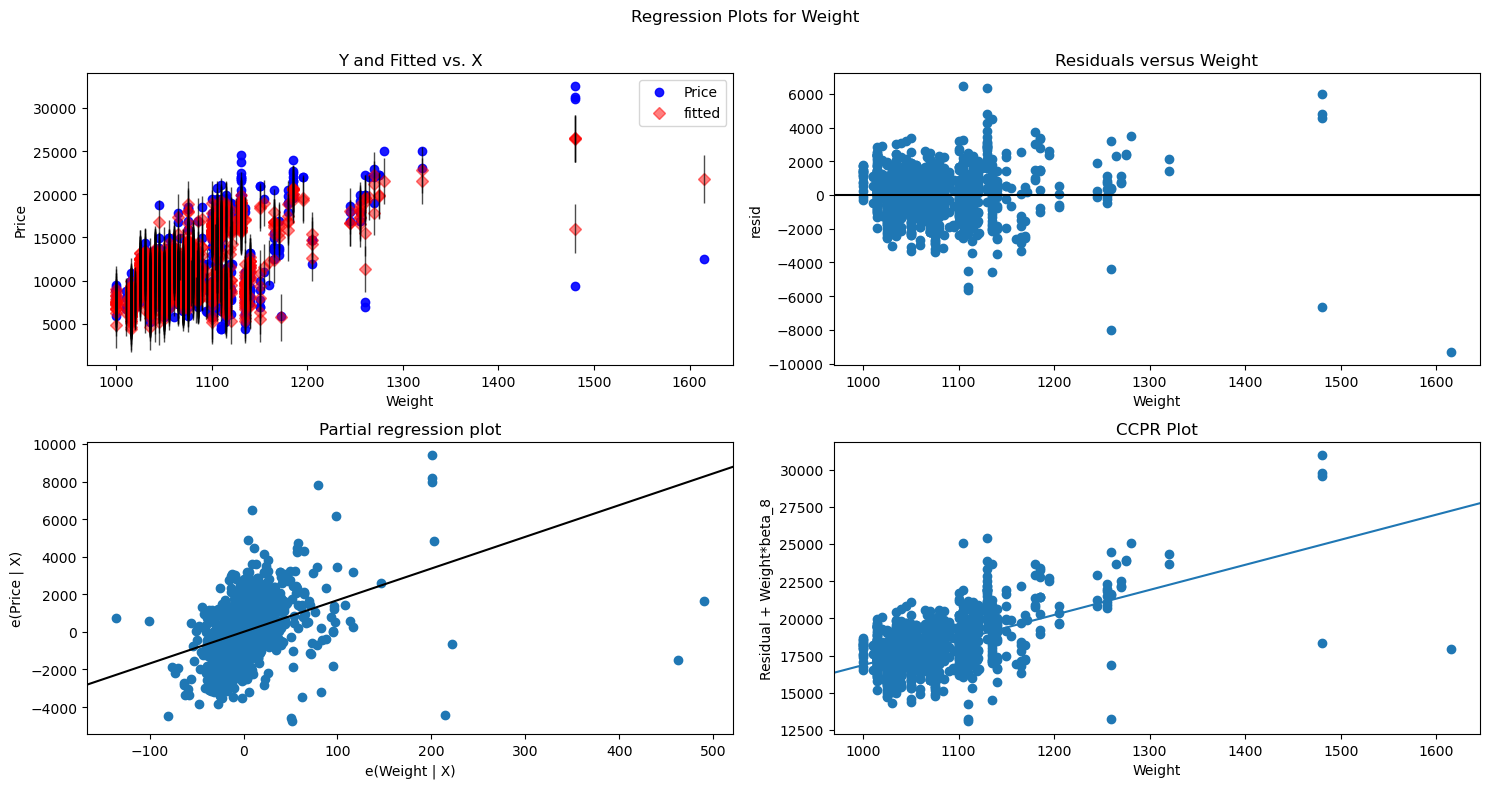

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

## Model Deletion Diagnostics (checking Outliers or Influencers)

## Cook's Distance

In [41]:
(c,_)=model.get_influence().cooks_distance
pd.DataFrame({'Cooks_Distance': c})

,Cooks_Distance
0,7.222211e-03
1,3.945480e-03
2,5.442240e-03
3,1.381834e-03
4,4.097835e-03
...,...
1430,6.045847e-04
1431,2.607901e-03
1432,8.041106e-07
1433,6.998548e-04


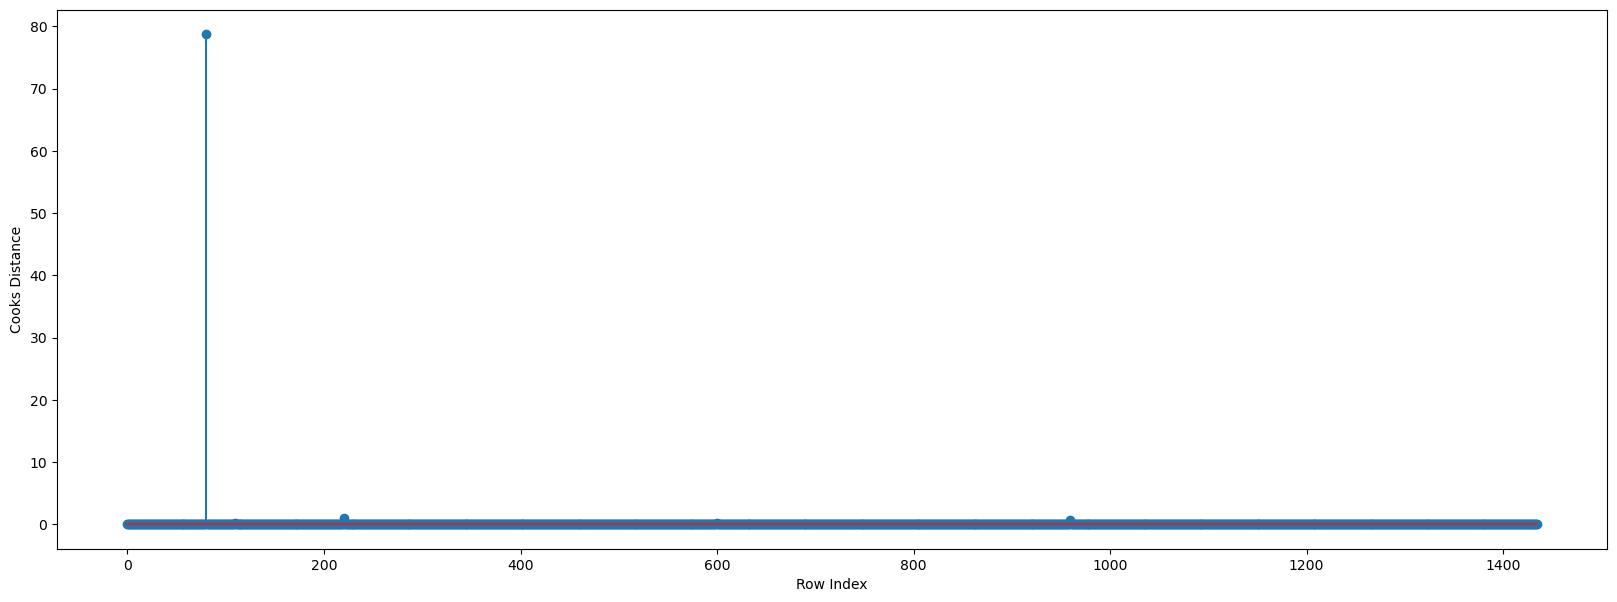

In [42]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyo)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
# Check max cook's Distance value and its position
np.max(c),np.argmax(c)

(78.7295058225869, 80)

## Maximum Cook's Distance for the Model is 78.7 which is less than 0.5 , There is Outlier that is Influencer

In [44]:
# Leverage Cutoff = (3*(k+1))/n k:No of Features/Columns used in Model(predictors) , n :Total Datapoints
k=toyo.shape[1]
n=toyo.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [45]:
from statsmodels.graphics.api import influence_plot

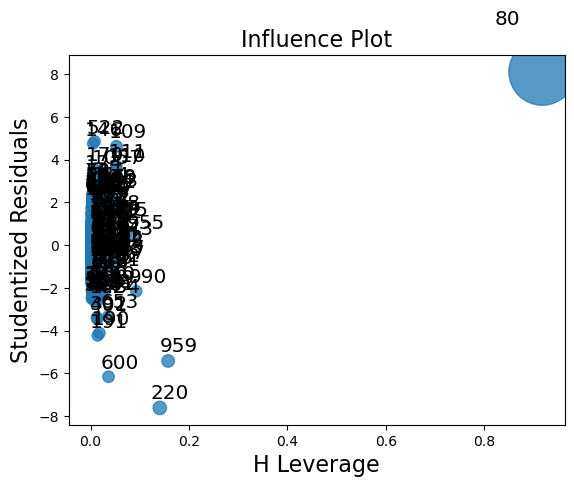

In [46]:
influence_plot(model)

## Studentized residuals could be concerning when their absolute values exceed 2.  This is an aggressive stance and one could relax this criteria and consider studentized residuals exceeding 3 as an outlier.
## From Above Influence Plot shows Point 80 as Outlier which is greater than 3 , We will improve Model by removing 80th Data Record and re-train the model

In [47]:
toyo.iloc[80]

Price            18950
Age                 25
KM               20019
HP                 110
CC               16000
Doors                5
Gears                5
Quarterly_Tax      100
Weight            1180
Name: 80, dtype: int64

In [48]:
improved_data=toyo.drop(toyo.index[80]).reset_index(drop=True)

In [49]:
improved_data

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [50]:
model1=ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=improved_data).fit()
model1.rsquared

0.8681163912634053

In [51]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:06:09   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age            -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM               -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP               39.2245      2.912     13.470      0.000      33.512      44.937
CC               -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors           -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears           527.1292    192.832      2.734      0.006     148.864     905.395
Quarterly_Tax     8.9414      1.427      6.268      0.000       6.143      11.740
Weight           20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#Cook's Distance for new model
(c,_)=model1.get_influence().cooks_distance

In [53]:
while np.max(c)>0.5:
    m1=ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=improved_data).fit()
    (c,_)=m1.get_influence().cooks_distance
    print("removing the row number",np.argmax(c))
    print("-----------------------------")
    improved_data=improved_data.drop(improved_data.index[[np.argmax(c)]]).reset_index(drop=True)
    improved_data
else:
    final_model=ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=improved_data).fit()
    print("Thus model accuracy is improved to",final_model.rsquared)

removing the row number 219
-----------------------------
removing the row number 957
-----------------------------
removing the row number 598
-----------------------------
Thus model accuracy is improved to 0.8882395145171204


# Model Prediction

In [54]:
unseen_data=pd.DataFrame({'Age':6,'KM':46000,'HP':90,'CC':1500,'Doors':4,'Gears':6,'Quarterly_Tax':98,'Weight':1210},index=['Quote'])
unseen_data

,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
Quote,6,46000,90,1500,4,6,98,1210


In [55]:
final_model.predict(unseen_data)

Quote    21442.074314
dtype: float64

In [56]:
pd.DataFrame({'Prepared_Model':['Model','Final Model'],'R^2_Value':[model.rsquared,final_model.rsquared]})

,Prepared_Model,R^2_Value
0,Model,0.86252
1,Final Model,0.88824
